1. https://archive.ics.uci.edu/ml/datasets/IDA2016Challenge

Ваша цель получить как можно более высокие метрики сконцентрировавшись на преобразовании признаков.
Опробуйте различные техники - замены НаНов, замена аномалий, работа с категориальными переменными.
Попробуйте техники, используемые для несбалансированных датасетов.
В качестве прогнозирующих алгоритмов можете использовать любой, но в рамках курса на текущий момент разумнее использовать логистическую регрессию и kNN.

1) Понятное описание: какие техники и алгоритмы были опробованы - было бы неплохо в самом начале тезисно выписать опробованные методики и их результат (помогло / не помогло).

2) Наличие визуализаций (не обязательно строить много графиков - можно пару репрезентативных)
3) Наличие хотя бы одной модификации данных, приводящей к улучшению результатов.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [2]:
data = pd.read_csv('./data/aps_failure_training_set.csv', skiprows=20, na_values=['na'])
data.shape

(60000, 171)

In [3]:
data_test = pd.read_csv('./data/aps_failure_test_set.csv', skiprows=20, na_values=['na'])

In [4]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [5]:
data.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [7]:
nan_vals = data_test.isnull().sum()/data.shape[0]*100
nan_vals.sort_values(ascending=False)[:10]

br_000    21.881667
bq_000    21.635000
bp_000    21.201667
bo_000    20.626667
cr_000    20.605000
ab_000    20.605000
bn_000    19.521667
bm_000    17.576667
bl_000    12.043333
bk_000    10.156667
dtype: float64

## Распределение целевой переменной


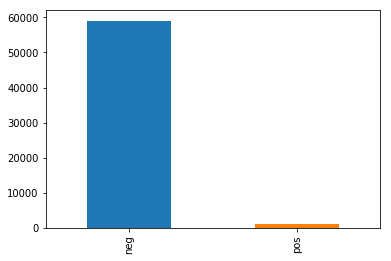

In [8]:
data['class'].value_counts().plot.bar()

### Вывод:
Очень несбалансированная целевая переменная

In [9]:
data['class'] = data['class'].map({'neg':0, 'pos':1})
data_test['class'] = data_test['class'].map({'neg':0, 'pos':1})

## Baseline: удалим NAN 
(даже если их слишком много)

In [10]:
data_train_no_nan = data.dropna()
data_test_no_nan = data_test.dropna()

In [11]:
X_train, X_test = data_train_no_nan.drop(labels=['class'], axis=1), data_test_no_nan.drop(labels=['class'], axis=1)
y_train, y_test = data_train_no_nan['class'],data_test_no_nan['class']
print("Train_shape:", X_train.shape, "Test shape:", X_test.shape)

Train_shape: (591, 170) Test shape: (165, 170)


In [12]:
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
        
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [13]:
model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

In [14]:
def quality_report(prediction, actual):
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precision, recall, f1, rocauc]  
    return quality_list

quality_list_baseline = quality_report(pred, y_test)

In [15]:
df_quality = pd.DataFrame(
    [quality_list_baseline],
    columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
    index=["base:Logreg no Nan"]
)
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
base:Logreg no Nan,0.958,0.833,0.926,0.877,0.945


In [16]:
def fill_NA(data, strategy='mean', NA_cols=[]):
    data_copy = data.copy(deep=True)
    for c in NA_cols:
        if data_copy[c].isnull().sum()>0:
            if strategy=='mean':
                data_copy[c] = data_copy[c].fillna(data[c].mean())
            elif strategy=='median':
                data_copy[c] = data_copy[c].fillna(data[c].median())
            elif strategy=='mode':
                data_copy[c] = data_copy[c].fillna(data[c].mode()[0])
    return data_copy

In [17]:
data_mode = fill_NA(data, strategy='mean', NA_cols=data.columns[1:])
data_test_mode = fill_NA(data_test, strategy='mean', NA_cols=data_test.columns[1:])

In [18]:
def assess_data(data, data_test, df_quality, exp_name, verbose=False, penalty=False):
    X_train, X_test = data.drop(labels=['class'], axis=1) , data_test.drop(labels=['class'], axis=1)
    y_train, y_test = data['class'] , data_test['class']
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
    
    if penalty:
        model_LogR = LogisticRegression(penalty = 'l2')
    else:
        model_LogR = LogisticRegression(solver="liblinear")
    model_LogR.fit(X_train_scaled, y_train)
    pred = model_LogR.predict(X_test_scaled)

    quality_list = quality_report(pred, y_test.values)
    
    df_quality.loc[exp_name, :] = quality_list
    
    return df_quality.round(3)

In [19]:
df_quality = assess_data(data_mode, data_test_mode, df_quality, exp_name="Logregression NaN w/mean", verbose=False)

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
base:Logreg no Nan,0.958,0.833,0.926,0.877,0.945
Logregression NaN w/mean,0.990,0.696,0.829,0.757,0.911


In [20]:
data_median = fill_NA(data, strategy='median', NA_cols=data.columns[1:])
data_test_median = fill_NA(data_test, strategy='median', NA_cols=data_test.columns[1:])

In [21]:
df_quality = assess_data(data_median, data_test_median, df_quality, exp_name="Logregression NaN w/median", verbose=False)

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
base:Logreg no Nan,0.958,0.833,0.926,0.877,0.945
Logregression NaN w/mean,0.990,0.696,0.829,0.757,0.911
Logregression NaN w/median,0.990,0.704,0.841,0.766,0.917


In [22]:
data_mode = fill_NA(data, strategy='mode', NA_cols=data.columns[1:])
data_test_mode = fill_NA(data_test, strategy='mode', NA_cols=data_test.columns[1:])

In [23]:
df_quality = assess_data(data_mode, data_test_mode, df_quality, exp_name="Logregression NaN w/mode", verbose=False)

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
base:Logreg no Nan,0.958,0.833,0.926,0.877,0.945
Logregression NaN w/mean,0.990,0.696,0.829,0.757,0.911
Logregression NaN w/median,0.990,0.704,0.841,0.766,0.917
Logregression NaN w/mode,0.990,0.696,0.847,0.764,0.920


## Регуляризация

Замена модой чуть лучше других двух вариантов

## Correlation

In [25]:
def corr_feature_detect(data, threshold=0.8):
    
    corrmat = data.drop(['class'], axis=1).corr()

    corrmat = corrmat.abs().unstack().sort_values(ascending=False)

    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    correlated_feats = []

    for row in corrmat.values:
        f1, f2, corr_value = row

        if not ((f1 in correlated_feats) | (f2 in correlated_feats)):
            f1_feat_len = corrmat[(corrmat.feature1==f1) | (corrmat.feature2==f1)].shape[0]
            f2_feat_len = corrmat[(corrmat.feature1==f2) | (corrmat.feature2==f2)].shape[0]

            if f1_feat_len >= f2_feat_len:
                correlated_feats.append(f1)
            else:
                correlated_feats.append(f2)
    
    return correlated_feats

In [26]:
data_corr_features = corr_feature_detect(data, threshold=0.8)
len(data_corr_features)

58

In [27]:
data_non_corr = data.drop(data_corr_features, axis=1)
data_non_corr_test = data_test.drop(data_corr_features, axis=1)

In [28]:
data_non_corr_test.shape, data_non_corr.shape

((16000, 113), (60000, 113))

In [29]:
data_corr_mode = fill_NA(data_non_corr, strategy='mode', NA_cols=data_non_corr.columns[1:])
data_test_corr_mode = fill_NA(data_non_corr_test, strategy='mode', NA_cols=data_non_corr_test.columns[1:])

In [30]:
df_quality = assess_data(data_corr_mode, data_test_corr_mode, df_quality, exp_name="Logregression Corr & Nan w/mode", penalty=True)

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
base:Logreg no Nan,0.958,0.833,0.926,0.877,0.945
Logregression NaN w/mean,0.990,0.696,0.829,0.757,0.911
Logregression NaN w/median,0.990,0.704,0.841,0.766,0.917
Logregression NaN w/mode,0.990,0.696,0.847,0.764,0.920
Logregression L2 Nan w/mode,0.990,0.696,0.847,0.764,0.920
Logregression Corr & Nan w/mode,0.988,0.637,0.830,0.721,0.911


3. Попробуйте техники, используемые для несбалансированных датасетов.


4. Пробуем  kNN c заменой на моду убрав сильно скоррелированные данные

In [ ]:
X_train, X_test = data_corr_mode.drop(labels=['class'], axis=1) , data_test_corr_mode.drop(labels=['class'], axis=1)
y_train, y_test = data_corr_mode['class'], data_test_corr_mode['class']
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

param_grid = {'n_neighbors': range(1,7)}

knn = KNeighborsClassifier()
knn_model = GridSearchCV(knn, param_grid)
knn_model.fit(X_train_scaled, y_train)
pred = knn_model.predict(X_test_scaled)  
print('_'*50)
print("Best model " + str(knn_model.best_params_))
print("Train quality:")
quality_report(knn_model.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn_model.predict(X_test_scaled), y_test)
print('_'*50)

In [ ]:
quality_list = quality_report(pred, y_test.values)
    
df_quality.loc["GridSearchCV knn ", :] = quality_list
df_quality.round(3)

#### Техники и алгоритмы, которые были опробованы:
1. Логрессия без пропусков, всего лишь на 590 трейн/165 тест данных показывает наилучший ROC-AUC, F1, Recall и Precision, которые не удалось побить, даже используя
- замену модой/медианой/средним значением в логрегресии
- Л2 регуляризацией с заменой моды
- удаление сильно скоррелированных данных
Но получилось улучшить Accuracy

2. kNN  c наилучшими параметрами на замене пропусков модой после того, как убрали сильно скоррелированные данные, не показывает улучшение baseline.